> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [20]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import csv

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Import csv
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Separate Dates and Time for Scheduled day
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)

# Separate Date from Time for AppointmentDay
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df['day'] = df['AppointmentDay'].dt.weekday_name


df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [22]:
#rename column that have miss spelling and remove spaces
df.rename(columns = {'SMS_received' : 'sms',
                      'No-show' : 'noshow',
                    'Hipertension' : 'Hypertension',
                    'Handcap': 'Handicap',
                     'Alcoholism':'Alchoholism'}, inplace= True)


statuses = ['Diabetes', 'Alchoholism', 'Hypertension', 'Handicap', 'Scholarship']


#remove anything under 0 and over 91
df = df[(df.Age >= 0) & (df.Age <= 90)]


#Check for Null Values 
df.isnull().any()

#General Statistics : Results: 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,sms
count,1.102180e+05,1.102180e+05,110218.000000,110218.000000,110218.000000,110218.000000,110218.000000,110218.000000,110218.000000
mean,1.475031e+14,5.675320e+06,36.931617,0.098541,0.195948,0.071776,0.030485,0.022011,0.321263
std,2.561286e+14,7.122510e+04,22.948178,0.298046,0.396931,0.258118,0.171918,0.160709,0.466964
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.169965e+12,5.640271e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.169818e+13,5.680560e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.437432e+13,5.725532e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,90.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [23]:
#droping AppointmentID due to no use
df.drop(['AppointmentID'],axis=1, inplace=True)

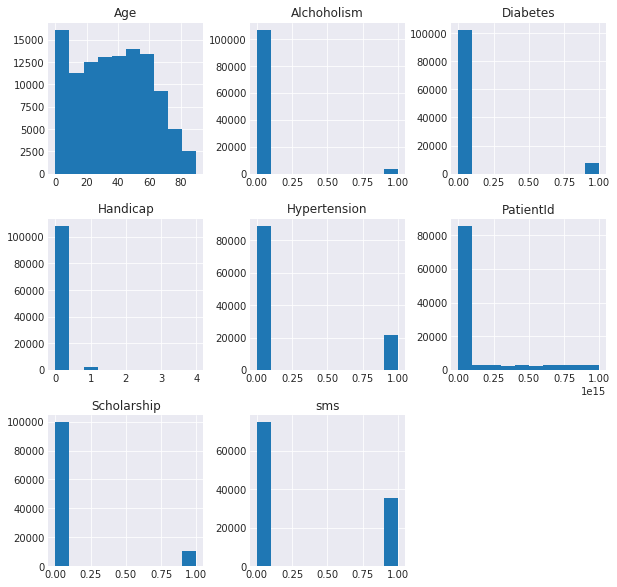

In [24]:
#Age : Skewed left distribution, Children to older age. Go to doctor more at a younger age and start to decrase
#Status: Has a small data set for any relationship. 
df.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

### What are the Total Percentage of No-Shows?
What are the Percentage of Patients to No-Shows?
How is this related to the frequency of appointments?

In [25]:
#Find the percentage of noshows
nos = df['noshow'].value_counts()[0]
yos = df['noshow'].value_counts()[1]
total = df['noshow'].count()
total_of_no = (nos / total)*100
total_of_yes = (yos / total)*100

#print Percentage
print('The Percent of No shows are : {} %\n'
    'The Percent of Yes shows are : {}%\n'.format(total_of_no, total_of_yes))


The Percent of No shows are : 79.8063837122793 %
The Percent of Yes shows are : 20.193616287720697%



Result: High levels of No-Shows to Yes-Shows. Next we would need to understand how many Patients have high rate of No Shows. With a high level of no-shows to Yes. I assume it is a certain population of people not going for some sort of reason. Finding the amount of people that have high levels of no-shows tell cancels out some questions. 

Text(0,0.5,'freq')

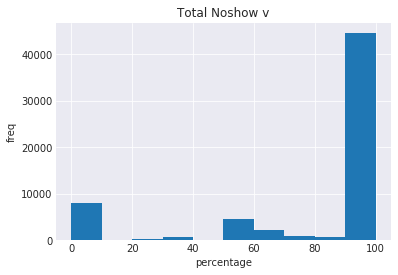

In [26]:
#function to view distribution of no show percentage per patient
PatientShow =pd.crosstab(index =df['PatientId'], columns = df['noshow']).reset_index()
PatientShow['pct_no_show'] = PatientShow['No']/(PatientShow['Yes'] + PatientShow['No'])*100


PatientShow['pct_no_show'].hist()
plt.title('Total Noshow v')
plt.xlabel('percentage')
plt.ylabel('freq')
#Means for pct_no_show = about 80%

With such a high frequency of no shows. How is this related to the amount of times a patient frequency to the hospital? Next plot is to allow an insight of total appointments per patient and the percentage of no show increase or decreases as freq increases.

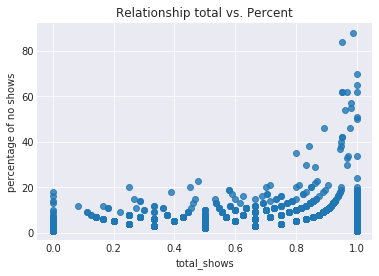

In [27]:
#Relationship of No show Appointments Percentage to Frequency
df2 = pd.crosstab(index =df['PatientId'], columns = df['noshow'])
#find total_show of no shows
df2['total_show'] = (df2['Yes'] + df2['No'])
# total of no shows/ total shows
df2['pct_no_show'] = df2['No']/df2['total_show']

#Plot the graph total vs pct_no_show
sns.set_style("darkgrid")
sns.regplot(df2['pct_no_show'],df2['total_show'], fit_reg=False)
plt.title('Relationship total vs. Percent')
plt.xlabel('total_shows')
plt.ylabel('percentage of no shows')
plt.show()

#As the frequency increases in patients, Percentage of Show up also decreases. 
#We can also see almost no change for patients that Show to No Show around total_show of 20

As Freq Increases, No show decreases. High freq of appointments could correlate to Age of the Patient. Age of Patients would explain more frequent visits. more freq visit means more chances of not showing up. 

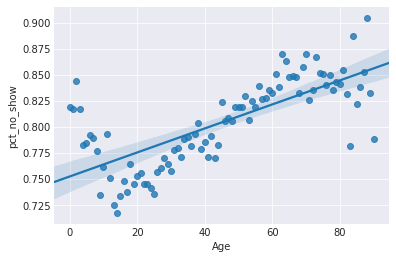

In [28]:
df3 = pd.crosstab(index = df['Age'], columns = df['noshow']).reset_index()
df3['pct_no_show'] = df3['No']/(df3['Yes'] + df3['No'])
sns.regplot(x=df3['Age'] ,y=df3['pct_no_show'])

### Does Gender or Day cause an increase or decrease of No-Show Appointments

Find the Relationship of Days and No Show Rates. Normally Certain days of the weeks is easier for families to show up to there appointments. This crosstab shows that Percentage of Showing up is about 26% for anyday. Saturday is an outlier due to other external possibilities that we do not know with only 39 results

In [29]:
#Look at 
x= pd.crosstab(df['day'],df['noshow'])
x['Percentage_Show']= x['Yes']/x['No']
print(x)
x['Percentage_Show'].mean()

#Slightly higher Percentage around the weekend and first day back to work. 
#lower Percentage around mid week due to higher work load before the weekend? Possibily

noshow        No   Yes  Percentage_Show
day                                    
Friday     14938  4026         0.269514
Monday     17984  4685         0.260509
Saturday      30     9         0.300000
Thursday   13862  3327         0.240009
Tuesday    20420  5130         0.251224
Wednesday  20727  5080         0.245091


0.26105787060848568

Find relationship with Genders and No-Show appointments. I assumed that females would in particularly go more frequently as they have more needs then males. By looking at the graph, Females definitley go way more then males, but actually have the same percentage of Show-up rate to females. About 25%

noshow     No    Yes  total_percentage
Gender                                
F       57074  14545          0.254845
M       30887   7712          0.249684


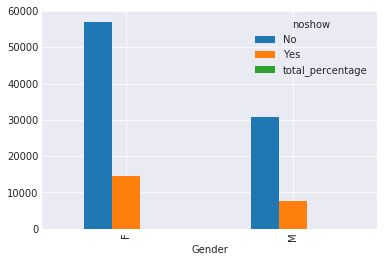

In [30]:
#Find the relationship of Gender and No Show and find the statistics between Males and Females
x = pd.crosstab(df['Gender'],df['noshow'])
x['total_percentage'] = x['Yes']/x['No']
print(x)
x.plot(kind='bar')
plt.show()
#Females Seem to go more often then males. 

25% of Males and Females Show up to there appointments and go on any given day of the week. Adding ontop of the relationship it has by grouping Gender and noshows to the days given. Monday-Wednesday has higher volume of Appointments, but just as low turn over rate.  Seems like Day and Gender do not have much predictability toward them. So, we won't consider them too much in our prediction. 

In [31]:

DNS = pd.crosstab(df['day'],[df['noshow'], df['Gender']])
print(DNS)


noshow        No         Yes      
Gender         F     M     F     M
day                               
Friday      9634  5304  2603  1423
Monday     11545  6439  3097  1588
Saturday      22     8     7     2
Thursday    8931  4931  2143  1184
Tuesday    13409  7011  3406  1724
Wednesday  13533  7194  3289  1791


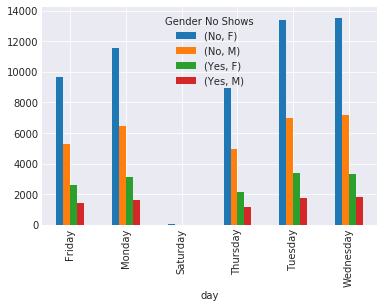

In [32]:
#Create a plot bar graph of the crosstabs for visualization
DNS.plot.bar(stacked= False)
plt.legend(title='Gender No Shows')
plt.show()

We wanted to find out if there was a relationship with Neighbourhoods and noshows. If any of the Neighbourhoods had a strong reason why people weren't showing up to the appointments, If it was common in all or uncommon in any. From the Stats it seems like about 80% no show rate was within multiple neighbourhoods with Std of 3% not a large curve for success rate.

In [33]:
#Question: Is there a relationship between Region and Age and No Shows ( looking at region and age does not seem that region has much affect on show

HoodShow = df.groupby(['Neighbourhood'])['noshow'].aggregate(['count'])
NoHood = df[df['noshow'] == 'No'].groupby('Neighbourhood')['noshow'].aggregate(['count'])
Percentage = NoHood['count']/HoodShow['count']*100

print(Percentage.describe())


count     80.000000
mean      80.453800
std        3.837938
min       71.193093
25%       78.341610
50%       80.231111
75%       82.011395
max      100.000000
Name: count, dtype: float64


Fact females and males do not have a general predictability for certains days that have higher chances of showing up and have about the same percentage of showing up rate. Status of a male or female could cause an increase in frequency of a gender depending on seriousness. it shows that, females has about 8% increase to show up to appointment with Alchoholism as for the other statuses. However, both genders have about the same percentage of no show rate per status except for Females and Alcholism.

              Hypertension  Diabetes Alchoholism  Handicap
                       sum       sum         sum       sum
Gender noshow                                             
F      No         0.827366  0.818540    0.748160  0.808834
       Yes        0.172634  0.181460    0.251840  0.191166
M      No         0.827581  0.823479    0.827328  0.826794
       Yes        0.172419  0.176521    0.172672  0.173206


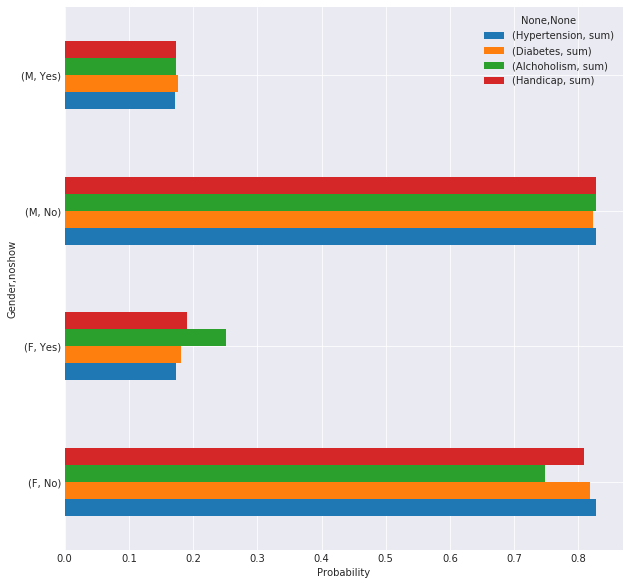

In [34]:
status=df[['Gender','Hypertension', 'Diabetes', 'Alchoholism', 'Handicap', 'noshow']].groupby(['Gender', 'noshow']).aggregate(['sum']).groupby(level = 0).transform(lambda x: x/x.sum())


status.plot(kind='barh', figsize=(10,10))
plt.xlabel("Probability")
print(status)



<a id='conclusions'></a>
## Conclusions

>  In the initial test about 79% of patients did not show up. No-Show rates could vary due to status(illness), DayoftheWeek, Gender, Age, Frequency. The count of this data was 110218.000000 and about 60% of the patients had a series of No-Show rate of 100% and only about 20,000 had 100% show up rate. Age and Frequency had a similar regression in terms that as frequency or age increase the levels of no show rate also increased. DayoftheWeek, Neighbourhood and Gender had no difference in appointment rate change or atleast a distinction of differences that would increase the possibility of show rate. However, Status for females that were alchoholics had about 8% impact on Yes-Show Rate. If i went more indepth of Await time or if Appointmentday was more accurate to tell await time of each patient, we can predict the rate of turn over as a patient is waiting. 




>Limiters: Seems to me that the limiters of this data is the dates that are given. The months are from April to June. Small sample in terms of months. If the data set had sample size throughout the year, we can make a better inference interms of patients show rates. The data needed more in terms of patient history(income, reason for visits, patients past history show rates). Possibly if this was a hospital, type of insurance coverage. 

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0